<font face="Arial"><br>
<font size="7"> SAR Application: Fire Extent Detection and Mapping </font>
<img src="uavsar.png" width="250" align="right" /> <br> 
<font size="6"> L-Band SAR Fire Scar<font color='rgba(200,0,0,0.2)'> </font> 
<br><font size="5"> I. How to create SAR quicklook images of fire extent? <font color='rgba(200,0,0,0.2)'> </font> 
<br><font size="3"> PolSAR HH and HV (and VV if possible) are useful products for fire extent. For viewing, Pauli decomposition can be used for quad-pol, or HH/HV and VV/VH for dual-pol images. Grayscale coherence correlation products can also highlight areas of change. Coherence product values range 0-1. To view, use the same scale for "before" and "after" image to facilitate comparison. </font>
<br><font size="5">  II. How to interpret SAR images of fire extent?<font color='rgba(200,0,0,0.2)'> </font> 
<br><font size="3"> To interpret SAR images of burned areas, compare fire scar with vegetation in the same area. Area impacted by fire should show increase HH component (bare ground) and lower vegetation component (HV). 

For interpreting coherence products, compare image pairs with increasing temporal separation up to a maximum that is determined empirically. After a number of days, the entire image is decorrelated.	Close to black: open water bodies that decorrelate the fastest. Dark gray= decorrelated due to fire. Mid-gray and white have higher coherence or experienced less disturbance. </font>

<font size="6"> Verdugo Fire UAVSAR Example<font color='rgba(200,0,0,0.2)'> </font>
<font face="Arial"><br><font size="3"> 
The La Tuna Fire burned over 7,000 acres of the Verdugo Mountains in Los Angeles, California, making it the largest wildfire in the city of Los Angeles in the last 50 years. The fire started September 1, 2017 and was 100% contained by September 9.   
    
This interactive map displays two Pauli RGB UAVSAR images of line SanAnd_08525, acquired June 24, 2014 (Pre-fire) and November 02, 2017 (Post-fire). Between these acquisitions, the fire scar on the Western side of the mountains is evident. 

The overlay of the intensities of the different polarization channels, allows users to visually classify a scene by its backscattering mechanism, such as surface scattering (strong HH and VV return), volume scattering (strong HV return) and double-bounce scattering (strong HH return). Thus in RGB images, areas dominated by green (HV) intensity are typically vegetated areas. Areas dominated by shades of pink (HH+HV) intensity are typically inundated forests or vegetated fields. Black and dark grey areas are usually smooth surfaces (roads, open water, smooth bare ground) where there is very little radar backscatter.   

The coherence product of this image pair also highlights this area of disturbance, with lower coherence values. 
    <font color='rgba(200,0,0,0.2)'> </font> </font>

In [37]:
from ipyleaflet import (Map, basemaps, basemap_to_tiles, SplitMapControl, ImageOverlay, ScaleControl,
                        projections, LayersControl, FullScreenControl, LocalTileLayer, LegendControl)
import ipywidgets as widgets
from traitlets import Bool
from ipywidgets import AppLayout, Button, Layout, HTML
from pathlib import Path
from typing import *
import os

In [38]:
# Interactive Map Inputs
image1 = "2014_verdugo/{z}/{x}/{y}.png"
image2 = "2017_verdugo/{z}/{x}/{y}.png"
image3 = "verdugo_coherence/{z}/{x}/{y}.png"

class CustomLocalLayer(LocalTileLayer):
    tms = Bool(True).tag(sync=True, o=True)

m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(34.22, -118.3),
    zoom=12
    
)

layer = CustomLocalLayer(tms=True, path=image1, name="June 2014 (Pre-Fire)")
layer2 = CustomLocalLayer(tms=True, path=image2, name="November 2017 (Post-Fire)")
layer3 = CustomLocalLayer(tms=True, path=image3, name="Coherence")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV + VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Bare ground":"#261947", "Urban (double bounce)":"#e8cef5", "Vegetation":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='bottomleft', metric=True, imperial=False, maxwidth=500))

m

Map(center=[34.22, -118.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

<font size="5"> UAVSAR Image Coherence<font color='rgba(200,0,0,0.2)'> </font>
<font face="Arial"><br>
<font size="3"> 
    <font color='rgba(200,0,0,0.2)'> </font>

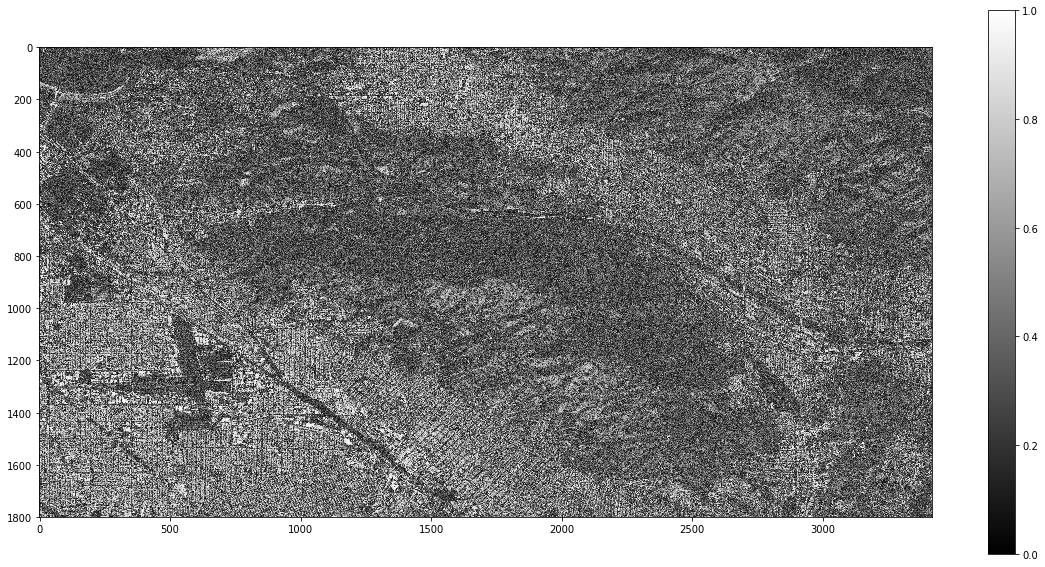

In [45]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

with rio.open('/Users/peacock/Downloads/verdugo_coherence_crop.tif') as coherence_tif:
    coherence = coherence_tif.read(1)

# Coherence
fig = plt.figure(figsize=(20,20))
cmap_reversed = matplotlib.cm.get_cmap('gray')
im = plt.imshow(coherence, cmap_reversed, vmin=0, vmax=1)
cbar=fig.colorbar(im,shrink=0.5)

im